In [10]:
#Importing dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
diabetes=pd.read_csv('diabetes-2.csv')
#splitting data into independent and dependent variable
X=diabetes.iloc[:,0:-1]
y=diabetes.iloc[:,-1]

In [15]:
diabetes.describe(include='all')
#helps us to understand how data has been spread across the table.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
diabetes['Outcome'].value_counts()
#0 is non diabetic
#1 is diabetic

0    500
1    268
Name: Outcome, dtype: int64

In [17]:
diabetes.head()#get familier with dataset, display the top 5 data records

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
diabetes.shape #getting to know about rows and columns we're dealing with - 768 rows , 9 columns

(768, 9)

In [19]:
diabetes.dtypes #knowledge of data type helps for computation

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [20]:
diabetes.columns#learning about the columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [21]:
#check for missing values, count them and print the sum for every column
print(diabetes.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [22]:
#checking for 0 values in 5 columns , Age & DiabetesPedigreeFunction 
#do not have have minimum 0 value so no need to replace , also no. of pregnancies as 0 is possible as observed in df.describe
print(diabetes[diabetes['BloodPressure']==0].shape[0])
print(diabetes[diabetes['Glucose']==0].shape[0])
print(diabetes[diabetes['SkinThickness']==0].shape[0])
print(diabetes[diabetes['Insulin']==0].shape[0])
print(diabetes[diabetes['BMI']==0].shape[0])

35
5
227
374
11


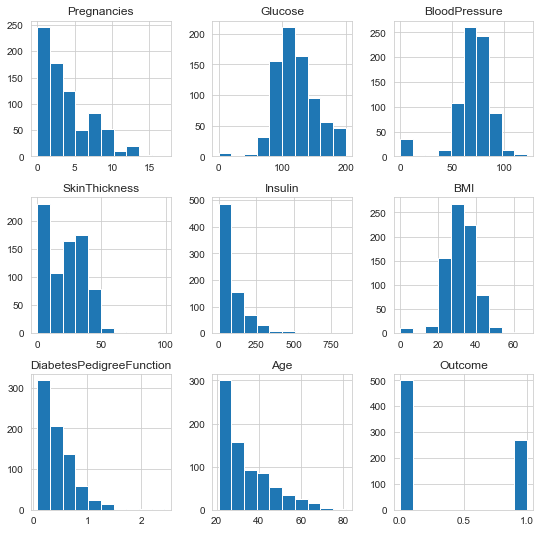

In [23]:
#histogram for each  feature
diabetes.hist(figsize=(9, 9))
plt.show()

In [24]:
#replacing 0 values with median of that column
diabetes['Glucose']=diabetes['Glucose'].replace(0,diabetes['Glucose'].mean())#normal distribution
diabetes['BloodPressure']=diabetes['BloodPressure'].replace(0,diabetes['BloodPressure'].mean())#normal distribution
diabetes['SkinThickness']=diabetes['SkinThickness'].replace(0,diabetes['SkinThickness'].median())#skewed distribution
diabetes['Insulin']=diabetes['Insulin'].replace(0,diabetes['Insulin'].median())#skewed distribution
diabetes['BMI']=diabetes['BMI'].replace(0,diabetes['BMI'].median())#skewed distribution

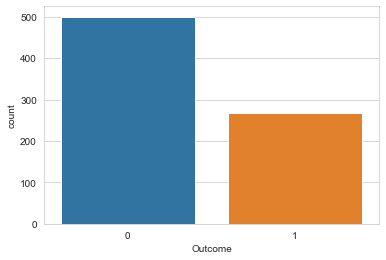

In [25]:
#to see if the dataset is balanced or not
ax=sns.countplot(x ='Outcome', data = diabetes)
plt.show()

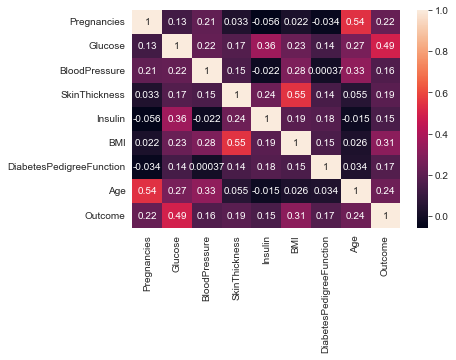

In [26]:
c=diabetes.corr()
c
#visualizing correlation matrix
sns.heatmap(c, annot=True);

In [27]:
diabetes_sel=X.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction','SkinThickness','Pregnancies'],axis='columns')
diabetes_sel

,Glucose,BMI,Age
0,148,33.6,50
1,85,26.6,31
2,183,23.3,32
3,89,28.1,21
4,137,43.1,33
...,...,...,...
763,101,32.9,63
764,122,36.8,27
765,121,26.2,30
766,126,30.1,47


<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

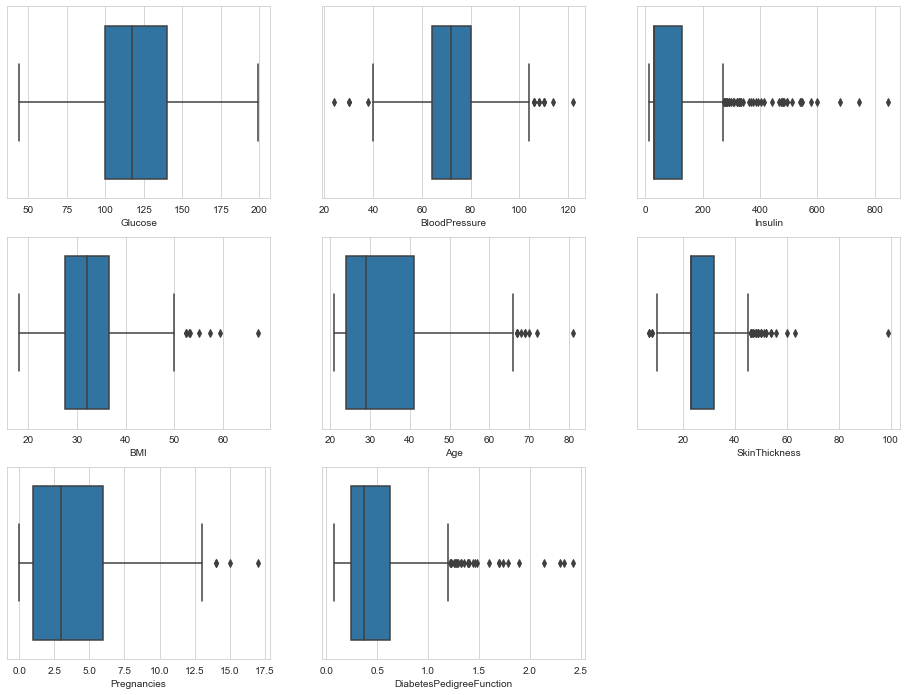

In [28]:
#plotting boxplot to find outliers
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=diabetes)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=diabetes)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=diabetes)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=diabetes)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=diabetes)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=diabetes)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=diabetes)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=diabetes)